In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from realestate_com_au import RealestateComAu

api = RealestateComAu()

# Get property listings
listings = api.search(locations=["NSW"], channel="sold")


In [4]:
count = 0
for list in listings:
    count += 1

print(listings[0].id)
type(listings[0].id)
print(count)

138571939
1000


In [5]:
columns = ['id', 'url', 'suburb', 'state', 'postcode', 'short_address', 'full_address', 'property_type', 'price', 'bedrooms', 'bathrooms', 'parking_spaces', 'building_size', 'building_size_unit', 'land_size', 'land_size_unit', 'listing_company_id', 'listing_company_name', 'listing_company_phone', 'auction_date', 'sold_date', 'description', 'listers']

df = pd.DataFrame(listings)

print(df)

            id                                                url  \
0    138571939  https://www.realestate.com.au/sold/property-ho...   
1    138288974  https://www.realestate.com.au/sold/property-ho...   
2    137937478  https://www.realestate.com.au/sold/property-ho...   
3    138354923  https://www.realestate.com.au/sold/property-ho...   
4    138195810  https://www.realestate.com.au/sold/property-ho...   
..         ...                                                ...   
995  138264994  https://www.realestate.com.au/sold/property-ho...   
996  138287386  https://www.realestate.com.au/sold/property-ho...   
997  138241766  https://www.realestate.com.au/sold/property-ho...   
998  137234830  https://www.realestate.com.au/sold/property-ho...   
999  137789778  https://www.realestate.com.au/sold/property-ap...   

              suburb state postcode             short_address  \
0          Annandale   NSW     2038      343 Annandale Street   
1        Kilaben Bay   NSW     2283      

In [6]:
#df.to_csv(r'C:\Users\sasmi\Desktop\Data Projects\Real estate project\real_sold.csv', index = False)

In [7]:
str(type(listings[0].bedrooms))

"<class 'int'>"

## Data Analysis

In [8]:
df.head()

,id,url,suburb,state,postcode,short_address,full_address,property_type,price,bedrooms,...,building_size_unit,land_size,land_size_unit,listing_company_id,listing_company_name,listing_company_phone,auction_date,sold_date,description,listers
0,138571939,https://www.realestate.com.au/sold/property-ho...,Annandale,NSW,2038,343 Annandale Street,"343 Annandale Street, Annandale, NSW 2038",house,4700000,5.0,...,None,398.0,m²,CCYSQI,BresicWhitney Estate Agents - Glebe,0293565555,None,19 Feb 2022,Auction Location: On site. <br/><br/>A freesta...,"[{'id': '1042879', 'name': 'Chris Nunn', 'agen..."
1,138288974,https://www.realestate.com.au/sold/property-ho...,Kilaben Bay,NSW,2283,250 Kilaben Road,"250 Kilaben Road, Kilaben Bay, NSW 2283",house,4200000,4.0,...,None,1472.0,m²,XFNTOT,Avery Property Professionals -,0249591677,None,19 Feb 2022,Premier waterfront position with impressive st...,"[{'id': '292071', 'name': 'Paul Avery', 'agent..."
2,137937478,https://www.realestate.com.au/sold/property-ho...,Casuarina,NSW,2487,33 Collins Lane,"33 Collins Lane, Casuarina, NSW 2487",house,2900000,4.0,...,None,505.0,m²,XLJKIN,LJ Hooker - Kingscliff,0266741000,None,19 Feb 2022,IMMACULATE SINGLE LEVEL BEACHFRONT CHARMER<br/...,"[{'id': '1907410', 'name': 'Nick Witheriff', '..."
3,138354923,https://www.realestate.com.au/sold/property-ho...,Merrylands,NSW,2160,51 & 53 Sheffield Street,"51 & 53 Sheffield Street, Merrylands, NSW 2160",house,2680000,6.0,...,None,1214.0,m²,STAMER,Starr Partners - Merrylands,0297606666,None,19 Feb 2022,"Presenting as an enormous high-side 1,214 sqm ...","[{'id': '1306961', 'name': 'Daniel Starr', 'ag..."
4,138195810,https://www.realestate.com.au/sold/property-ho...,Randwick,NSW,2031,4 Pitt Street,"4 Pitt Street, Randwick, NSW 2031",house,2665000,3.0,...,None,-1.0,None,XRWBOA,Ray White Park Coast -,0283831111/0293817000,None,19 Feb 2022,"Tucked away in a quiet enclave, this double-fr...","[{'id': '2861242', 'name': 'Adrian Bo', 'agent..."


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1000 non-null   object 
 1   url                    1000 non-null   object 
 2   suburb                 1000 non-null   object 
 3   state                  1000 non-null   object 
 4   postcode               1000 non-null   object 
 5   short_address          1000 non-null   object 
 6   full_address           1000 non-null   object 
 7   property_type          1000 non-null   object 
 8   price                  1000 non-null   int64  
 9   bedrooms               971 non-null    float64
 10  bathrooms              971 non-null    float64
 11  parking_spaces         971 non-null    float64
 12  building_size          115 non-null    object 
 13  building_size_unit     115 non-null    object 
 14  land_size              1000 non-null   float64
 15  land_

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1000.0,1.210193e+06,842484.330132,99000.0,720000.0,955000.0,1450000.0,9950000.0
bedrooms,971.0,3.220391e+00,1.203447,1.0,2.0,3.0,4.0,16.0
bathrooms,971.0,1.797116e+00,0.794979,1.0,1.0,2.0,2.0,8.0
parking_spaces,971.0,1.844490e+00,1.542363,0.0,1.0,2.0,2.0,20.0
land_size,1000.0,3.830694e+02,448.571895,-1.0,-1.0,300.0,651.0,3670.0


missing value

## Data Visualisation

<AxesSubplot:>

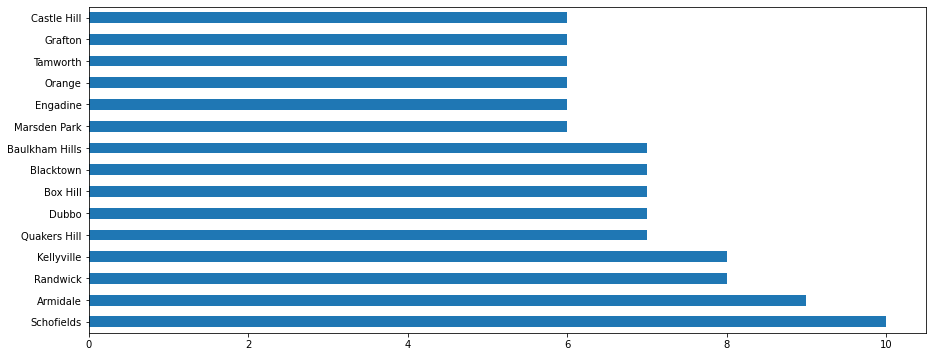

In [11]:
plt.figure(figsize=(15,6))
df["suburb"].value_counts()[:15].plot.barh()

<AxesSubplot:>

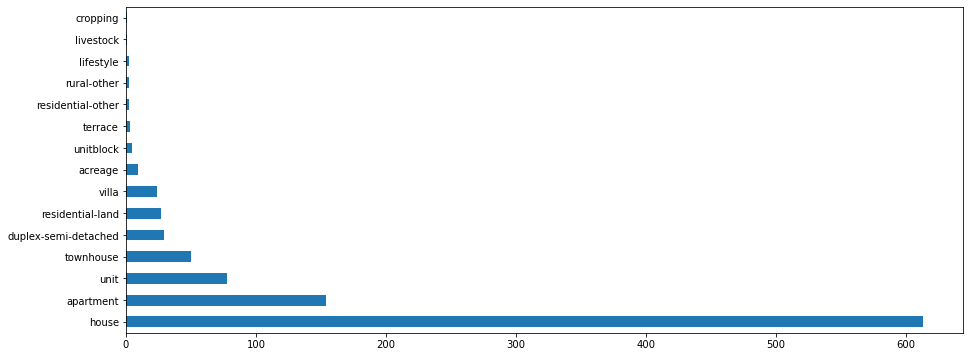

In [12]:
plt.figure(figsize=(15,6))
df["property_type"].value_counts().plot.barh()

In [13]:
data_num = df.select_dtypes(["float64", "int64"]).columns

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


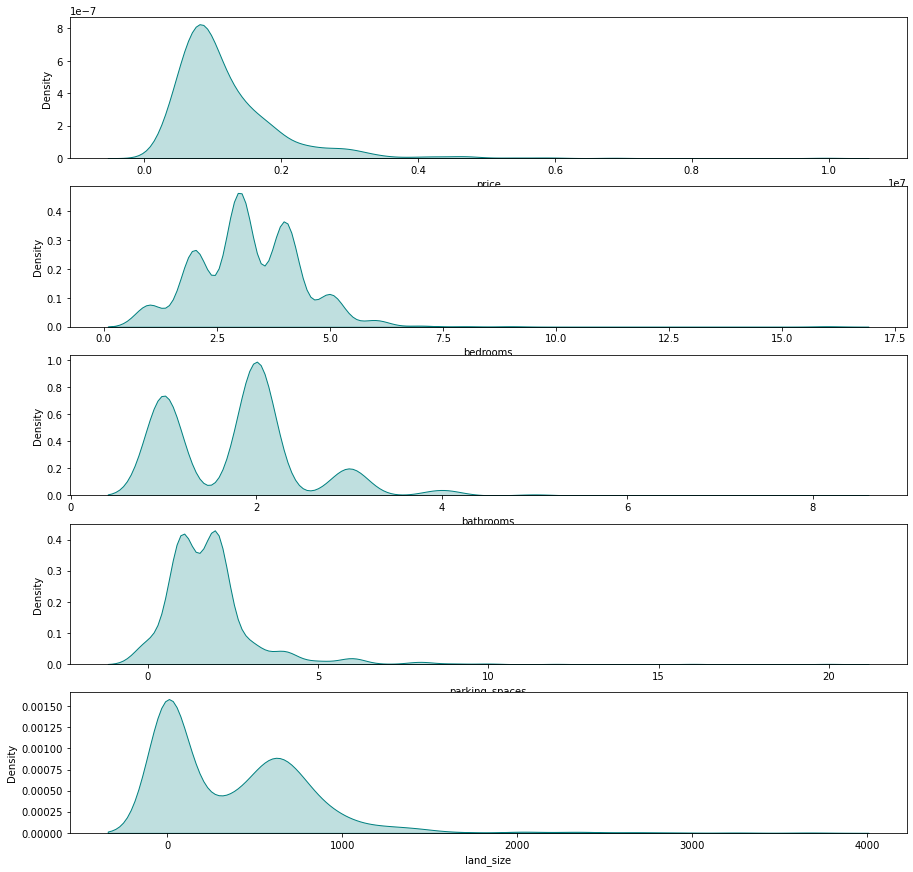

In [14]:
fig, ax = plt.subplots(nrows=5, figsize=(15,15))
count=0
for i in range(5):
    sns.kdeplot(df[data_num[count]], ax=ax[i], shade=True, color="#008080")
    count+=1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='property_type', ylabel='count'>

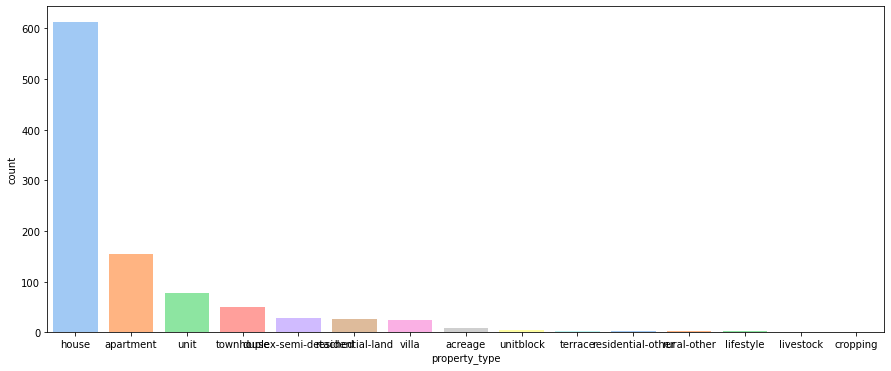

In [15]:
plt.figure(figsize=(15,6))
sns.countplot(df["property_type"], order = df['property_type'].value_counts().index ,saturation=1,palette="pastel")

month to month analysis
year to year analysis
missing heat map months vs years

<AxesSubplot:>

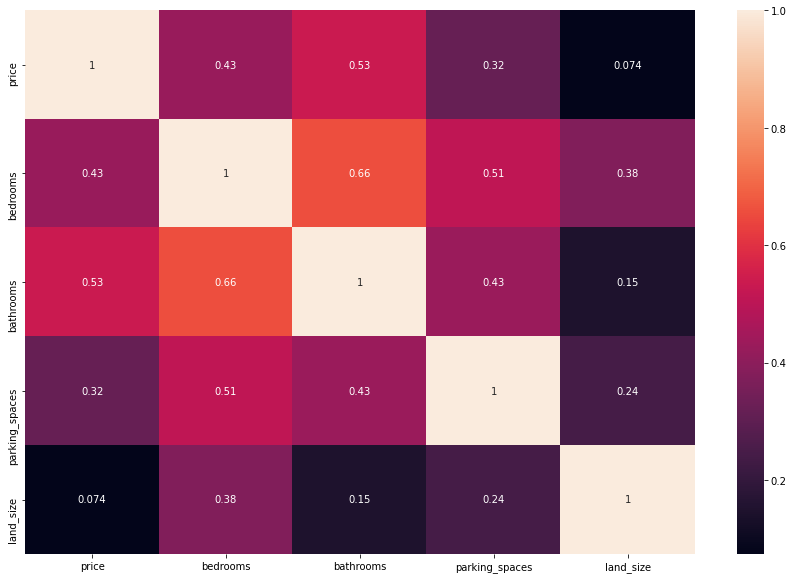

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),xticklabels=df.corr().columns, yticklabels=df.corr().columns, annot=True)

based of statiscal good practice corr() > 0.50 is a good coefficient
therefore there seems to be good relations price to be beedrooms
followed by bathroom/price or parking_space/price

<Figure size 1080x864 with 0 Axes>

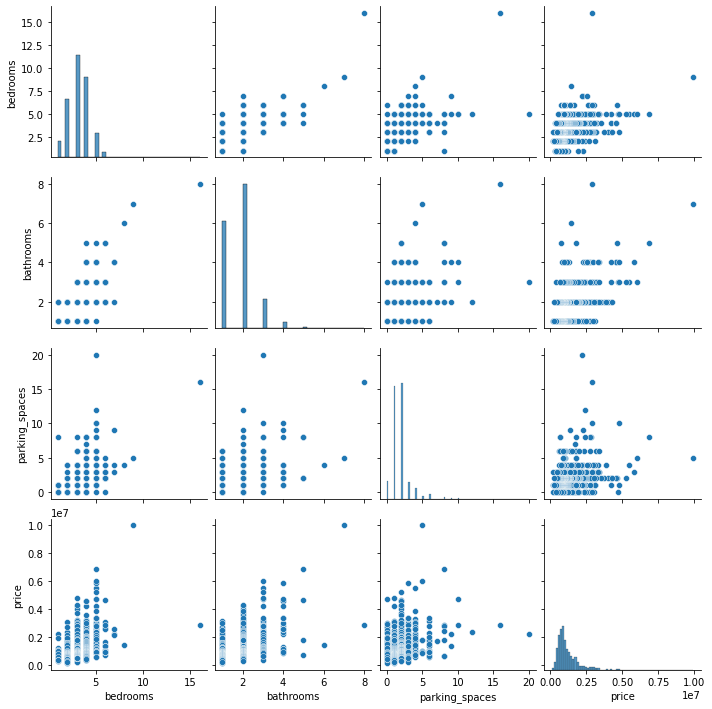

In [17]:
plt.figure(figsize = (15,12))
sns.pairplot(df, vars = ["bedrooms", "bathrooms", "parking_spaces", "price"])

based on correalation scored i made pair plot to see the interaction of these variables to the each other

## Data Classification

In [38]:
#average_pricing = df.groupby("suburb")["price"].mean().sort_values()
#find the mean pricing of the houses sort descending order of surburbs
average_pricing = (df.groupby("suburb")["price"].mean().sort_values())[::-1].astype("int")

In [39]:
average_pricing[:5]

suburb
West Pennant Hills    5690000
Rossmore              5380000
North Manly           5250000
Bayview               4387500
Point Piper           4320000
Name: price, dtype: int32